# 04.01 Data Frames

The `DataFrame` is just a collection of `Series` with a common index.
It can be understood as a two-dimensional representation of data,
similar to a spreadsheet.
Contrary to a two dimensional `NumPy` array,
**indexing a data frame with a single value produces the column** not the row.
Yet, indexing it with two values produces the row and the column
just like in a `NumPy` array.

Let's import the libraries until now.

In [1]:
import numpy as np
import pandas as pd

Constructing the data frame can be performed in several ways,
below is the most common way of using a dictionary of arrays.
Each dictionary key-value pair becomes a column (a `Series`).

We add more data to our example on the British Isles.
It is common to name a data frame as `df`.

In [2]:
country = ["Northern Ireland", "Scotland", "Wales", "England", "Isle of Man", "Ireland"]
capital = ["Belfast", "Edinburgh", "Cardiff", "London", "Douglas", "Dublin"]
state = ["United Kingdom", "United Kingdom", "United Kingdom",
         "United Kingdom", "Isle of Man", "Republic of Ireland"]
monarch = ["Elizabeth II", "Elizabeth II", "Elizabeth II",
           "Elizabeth II", "Elizabeth II", None]
area = np.array([14130, 77933, 20779, 130279, 572, 70273])
population2001 = [1.686e6, 5.064e6,  np.nan, 48.65e6, 77.703e3,  np.nan]
population2011 = [1.811e6, 5.281e6, 3.057e6, 53.01e6, 84.886e3, 4.571e6]
df = pd.DataFrame({"capital": capital,
                   "state": state,
                   "monarch": monarch,
                   "area": area,
                   "population 2001": population2001,
                   "population 2011": population2011,
                  },
                  index=country)
df

,capital,state,monarch,area,population 2001,population 2011
Northern Ireland,Belfast,United Kingdom,Elizabeth II,14130,1686000.0,1811000.0
Scotland,Edinburgh,United Kingdom,Elizabeth II,77933,5064000.0,5281000.0
Wales,Cardiff,United Kingdom,Elizabeth II,20779,NaN,3057000.0
England,London,United Kingdom,Elizabeth II,130279,48650000.0,53010000.0
Isle of Man,Douglas,Isle of Man,Elizabeth II,572,77703.0,84886.0
Ireland,Dublin,Republic of Ireland,None,70273,NaN,4571000.0


The underlying `NumPy` arrays can be concatenated
and returned using `.values`.
Note however that since we have different data types,
the NumPy array will have the `dtype=object`,
meaning an array of Python objects.
A memory inefficient representation.

In [3]:
array = df.values
array

array([['Belfast', 'United Kingdom', 'Elizabeth II', 14130, 1686000.0,
        1811000.0],
       ['Edinburgh', 'United Kingdom', 'Elizabeth II', 77933, 5064000.0,
        5281000.0],
       ['Cardiff', 'United Kingdom', 'Elizabeth II', 20779, nan,
        3057000.0],
       ['London', 'United Kingdom', 'Elizabeth II', 130279, 48650000.0,
        53010000.0],
       ['Douglas', 'Isle of Man', 'Elizabeth II', 572, 77703.0, 84886.0],
       ['Dublin', 'Republic of Ireland', None, 70273, nan, 4571000.0]],
      dtype=object)

Since the `NumPy` array can only hold one data type.
The array casted every data type to a Python object.
In reality `NumPy` arrays support compound data types
but these are considerably more complicated to use the data frames.

We have the same data in `NumPy` and `pandas`, and we can index it.
In `NumPy` a plain index produces a *row*.

In [4]:
array[0]

array(['Belfast', 'United Kingdom', 'Elizabeth II', 14130, 1686000.0,
       1811000.0], dtype=object)

Where in `pandas` a single index produces a *column*.

In [5]:
df['area']

Northern Ireland     14130
Scotland             77933
Wales                20779
England             130279
Isle of Man            572
Ireland              70273
Name: area, dtype: int64

Yet, there is a twist.
Using the implicit index (`.iloc`) produces the same behavior as `NumPy`.

In [6]:
df.iloc[0]

capital                   Belfast
state              United Kingdom
monarch              Elizabeth II
area                        14130
population 2001         1686000.0
population 2011         1811000.0
Name: Northern Ireland, dtype: object

Columns with simple names can be accessed as attributes.

In [7]:
df.area

Northern Ireland     14130
Scotland             77933
Wales                20779
England             130279
Isle of Man            572
Ireland              70273
Name: area, dtype: int64

Finally, multi-indexing works in the same way as `NumPy`:
One provides first the *row* and then the *column*.
And slicing works too.

In [8]:
df.loc["England", "capital":"area"]

capital            London
state      United Kingdom
monarch      Elizabeth II
area               130279
Name: England, dtype: object

Since fancy indexing works, we can select columns and then take
the underlying NumPy array with a single data type.

In [9]:
array = df[["area", "population 2001", "population 2011"]].values
array, array.dtype

(array([[1.41300e+04, 1.68600e+06, 1.81100e+06],
        [7.79330e+04, 5.06400e+06, 5.28100e+06],
        [2.07790e+04,         nan, 3.05700e+06],
        [1.30279e+05, 4.86500e+07, 5.30100e+07],
        [5.72000e+02, 7.77030e+04, 8.48860e+04],
        [7.02730e+04,         nan, 4.57100e+06]]),
 dtype('float64'))

### Summarize

Data frames have several useful methods to give a feel for the data.
With a reasonable amount of data you'd rather not want thousands of rows to
be printed.  What you want are methods to give you the data you are after quickly.

For example, looking at the beginning or end of sorted values will show outliers.
And in order to have sorted value we sort the index.
In this case we do not sort it in place,
although the final result is the same once we assign the variable back to itself.

In [10]:
df = df.sort_index()
df

,capital,state,monarch,area,population 2001,population 2011
England,London,United Kingdom,Elizabeth II,130279,48650000.0,53010000.0
Ireland,Dublin,Republic of Ireland,None,70273,NaN,4571000.0
Isle of Man,Douglas,Isle of Man,Elizabeth II,572,77703.0,84886.0
Northern Ireland,Belfast,United Kingdom,Elizabeth II,14130,1686000.0,1811000.0
Scotland,Edinburgh,United Kingdom,Elizabeth II,77933,5064000.0,5281000.0
Wales,Cardiff,United Kingdom,Elizabeth II,20779,NaN,3057000.0


The index is sorted, Therefore we get the countries in alphabetical order.

In [11]:
df.head(3)

,capital,state,monarch,area,population 2001,population 2011
England,London,United Kingdom,Elizabeth II,130279,48650000.0,53010000.0
Ireland,Dublin,Republic of Ireland,None,70273,NaN,4571000.0
Isle of Man,Douglas,Isle of Man,Elizabeth II,572,77703.0,84886.0


Sorted by area, should give us the biggest countries.

In [12]:
df.sort_values("area").tail(3)

,capital,state,monarch,area,population 2001,population 2011
Ireland,Dublin,Republic of Ireland,None,70273,NaN,4571000.0
Scotland,Edinburgh,United Kingdom,Elizabeth II,77933,5064000.0,5281000.0
England,London,United Kingdom,Elizabeth II,130279,48650000.0,53010000.0


The length of a data frame is the number of rows it has.

In [13]:
len(df)

6

The `describe` and `info` methods print two distinct types of statistics about the data frame.
One gives the statistical view of each column.

In [14]:
df.describe()

,area,population 2001,population 2011
count,6.000000,4.000000e+00,6.000000e+00
mean,52327.666667,1.386943e+07,1.130248e+07
std,49370.249324,2.327997e+07,2.051828e+07
min,572.000000,7.770300e+04,8.488600e+04
25%,15792.250000,1.283926e+06,2.122500e+06
50%,45526.000000,3.375000e+06,3.814000e+06
75%,76018.000000,1.596050e+07,5.103500e+06
max,130279.000000,4.865000e+07,5.301000e+07


And the other gives you a memory layout.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, England to Wales
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   capital          6 non-null      object 
 1   state            6 non-null      object 
 2   monarch          5 non-null      object 
 3   area             6 non-null      int64  
 4   population 2001  4 non-null      float64
 5   population 2011  6 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 336.0+ bytes


The data frame can also display plots (using `Matplotlib`) directly.
That said, if we want to display the plots within the notebook or style them,
we need to perform the `matplotlib` setup ourselves.

In [16]:
import matplotlib.pyplot as plt
plt.style.use("fast")

We can see the population growth in a graph.

Here `pandas` gives us a handle to the plot,
which we then use to get better ticks on the vertical axis
with `matplotlib` calls.
One can get the tick values from the axis itself
and then transform them into the labels of their liking.

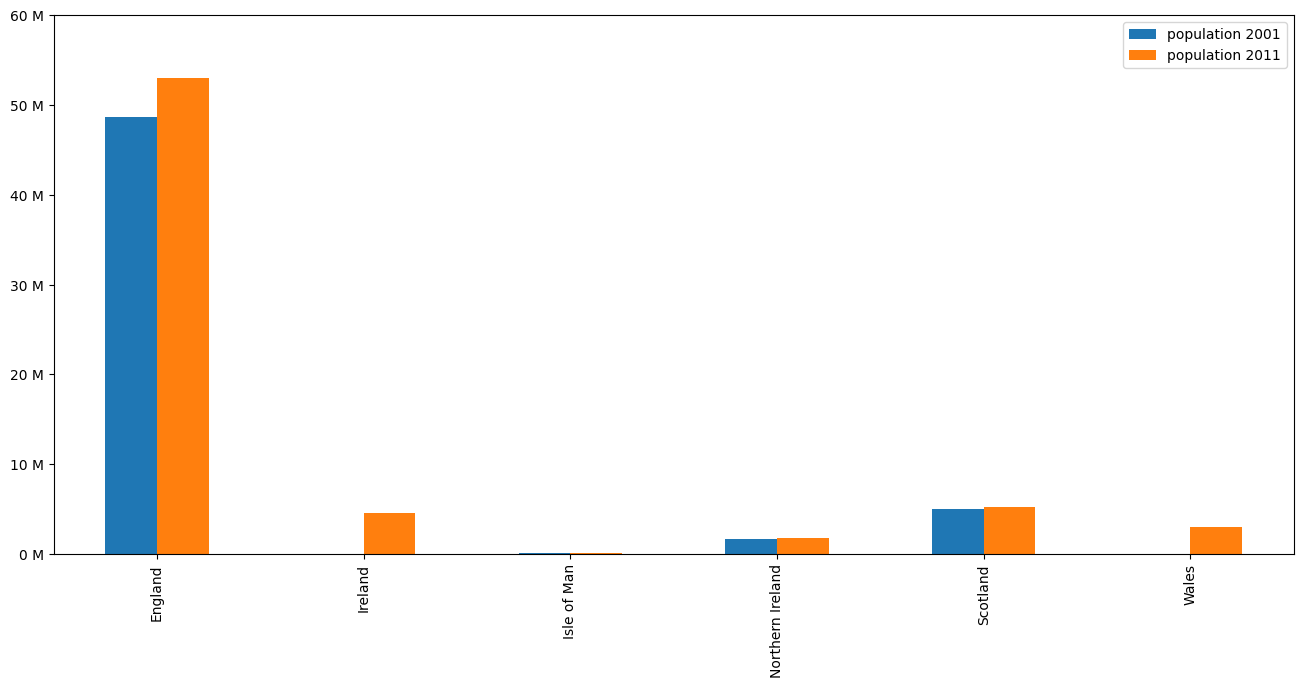

In [17]:
fig, ax = plt.subplots(figsize=(16, 7))
plot = df[["population 2001", "population 2011"]].plot(kind="bar", ax=ax)
ticks = plot.yaxis.get_majorticklocs()
tick_labels = [f"{x/1e6:.0f} M" for x in ticks]
plot.set_yticks(ticks)
plot.set_yticklabels(tick_labels);

And, on a logarithmic scale, we can see the relation between area and population.

Here we also use annotations, this is a `matplotlib` feature.
It annotates the string (first argument) over a point on the graph
(two coordinates - as a tuple, list or series).

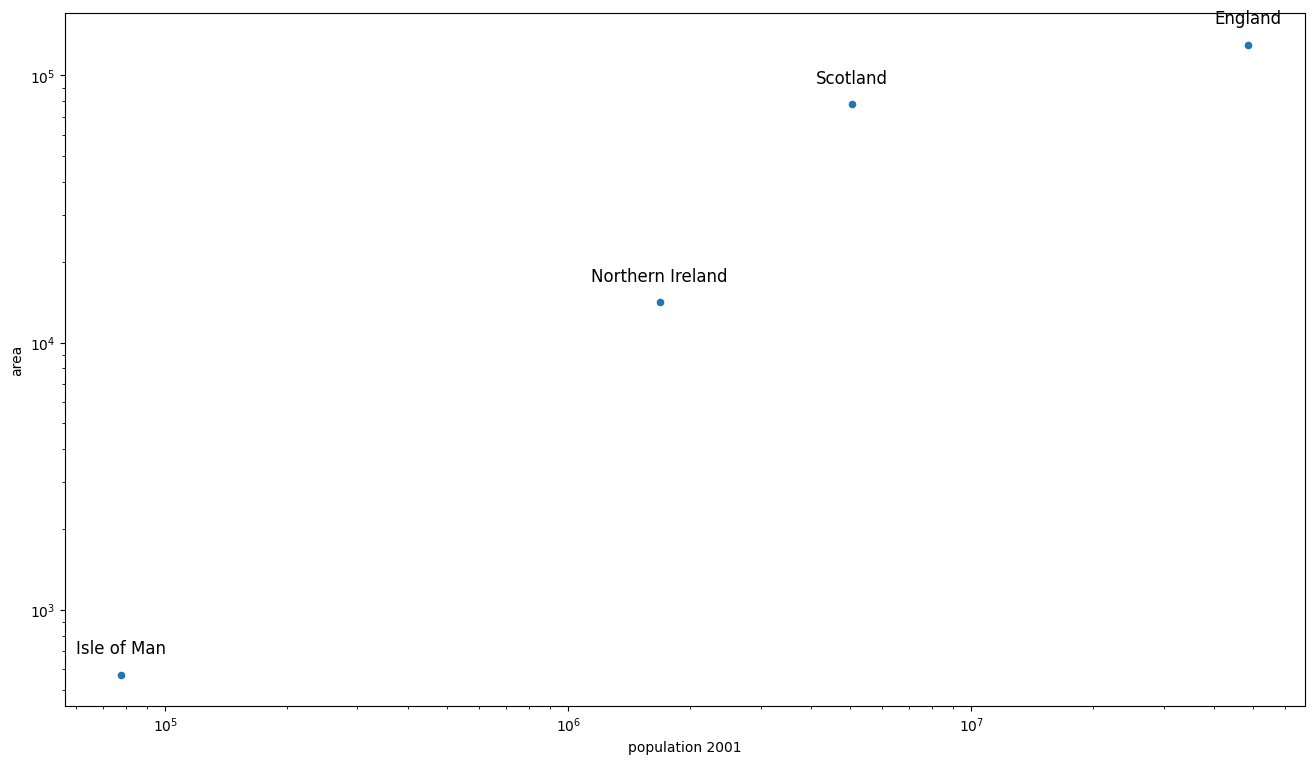

In [18]:
fig, ax = plt.subplots(figsize=(16, 9))
plot = df.plot(kind="scatter", x="population 2001", y="area", loglog=True, ax=ax)
for k, v in df[['population 2001', 'area']].iterrows():
    plot.axes.annotate(k, xy=v, xytext=(v.iloc[0], v.iloc[1]*1.2), ha="center", size=12)

Do not be fooled that the population density is the same in all four countries is the same.
Population density is population divided by area,
and since we have a straight line on the graph we may be inclined to think
that the population and are grow in the same fashion.
That would be a lie, both graph axes are in logarithmic scales due to `loglog=True`,
hence masking the real ratio between population and area.
Lying with graphs and statistics is easy, don't fall prey to it.
Plots in `pandas` give the convenience of doing the logarithms on the fly,
there are also the options for `logx=` and `logy=` for finer control.

Plotting with `pandas` is useful when one needs something quick and dirty to see the data.
Yet in order to make a presentable graph,
more often than not one will need to rely on `matplotlib`.
Either by taking the data from the underlying NumPy array

### Missing data

More often than not real world data is incomplete in some way.
Missing data is represented in several ways,
numeric values often use NaN (Not a Number)
which are actual IEEE 754 float standard NaNs.
String values will sometimes use the Python `None` value,
or sometime an empty string.
One must be careful with empty strings because the `isnull`
does not consider empty strings to be nulls.

This also means that the data type of the array underlying
a `Series` with missing data must be either a float or a Python object.
For non-floating point data types NaNs become rather complicated.
Several solutions have been attempted over the decades on how to handle NaN
values, with varied degree of success.
`pandas` attempts to use its own NaN solution, namely the value `pd.NA`.
At the time of writing you are likely to encounter pandas
versions using that as its default NaN treatment for some data types,
whilst using the IEEE 754 standard for other data types.
It is too early to argue which types will settle for which values
for missing data, be wary.

Let's look at a dataset where missing data is a natural occurrence.
Different countries in the British Isles have different governing structures,
for example counties do not exist in either Scotland or the Republic
of Ireland.
Moreover, the $2001$ census of the United Kingdom was not performed
in the countries outside of the United Kingdom.

In [19]:
city = ["Liverpool", "Manchester", "Cardiff",
        "Swansea", "Douglas", "Belfast",
        "Glasgow", "Edinburgh", "Dublin"]
country = ["England", "England", "Wales",
           "Wales", "Isle of Man",
           "Northern Ireland", "Scotland",
           "Scotland", "Ireland"]
county = ["Merseyside", "Greater Manchester", "South Glamorgan",
          "West Glamorgan", None,  "County Antrim and County Down",
          None, None, None]
population2001 = [435500, 405300, 305353,
                  270506, np.nan, 276459,
                  577869, 448624, np.nan]
population2011 = [466400, 503127, 335145,
                  239023,  27938, 333871,
                  593200, 476600, 554550]
df = pd.DataFrame({"county": county,
                   "country": country,
                   "population 2001": population2001,
                   "population 2011": population2011,
                  },
                  index=city)
df

,county,country,population 2001,population 2011
Liverpool,Merseyside,England,435500.0,466400
Manchester,Greater Manchester,England,405300.0,503127
Cardiff,South Glamorgan,Wales,305353.0,335145
Swansea,West Glamorgan,Wales,270506.0,239023
Douglas,None,Isle of Man,NaN,27938
Belfast,County Antrim and County Down,Northern Ireland,276459.0,333871
Glasgow,None,Scotland,577869.0,593200
Edinburgh,None,Scotland,448624.0,476600
Dublin,None,Ireland,NaN,554550


`pandas` data frames have the `dropna` an `fillna` methods that
(unsurprisingly) drop or fill in values for NaNs.
Dropping can be done by row or column.

In [20]:
df.dropna(axis="rows")

,county,country,population 2001,population 2011
Liverpool,Merseyside,England,435500.0,466400
Manchester,Greater Manchester,England,405300.0,503127
Cardiff,South Glamorgan,Wales,305353.0,335145
Swansea,West Glamorgan,Wales,270506.0,239023
Belfast,County Antrim and County Down,Northern Ireland,276459.0,333871


We lost the data for the Isle of Man, despite the fact that it has data for 2011.
Instead we can drop the incomplete columns.

In [21]:
df.dropna(axis="columns")

,country,population 2011
Liverpool,England,466400
Manchester,England,503127
Cardiff,Wales,335145
Swansea,Wales,239023
Douglas,Isle of Man,27938
Belfast,Northern Ireland,333871
Glasgow,Scotland,593200
Edinburgh,Scotland,476600
Dublin,Ireland,554550


That's better.  But we are still losing a lot of data.

Also note that instead of `NumPy`s `axis=0` and `axis=1`,
in `pandas` one can use `axis='index'` and `axis='columns'`.
That is, most of the time,
some `pandas` functions do accept `axis='row'` and `axis='col'`, beware.

Filling NaNs instead of losing entire rows and columns can be performed in three different ways:
we can provide a value into `fillna` to substitute the NaNs for (e.g. `.fillna(0)`); or we can use
the `method=` argument to use a predefined way of filling the NaNs from the data itself.
The `method=`
can be either `pad`/`ffill` which will fill each NaN with a previous (non-NaN) value seen; or it can be
`backfill`/`bfill` which will fill a NaN from the next value.
Filling can be performed column or row wise.
But column wise filling is almost never used since columns can have different data types.

In [22]:
df_fill = df.ffill(axis="index")
df_fill

,county,country,population 2001,population 2011
Liverpool,Merseyside,England,435500.0,466400
Manchester,Greater Manchester,England,405300.0,503127
Cardiff,South Glamorgan,Wales,305353.0,335145
Swansea,West Glamorgan,Wales,270506.0,239023
Douglas,West Glamorgan,Isle of Man,270506.0,27938
Belfast,County Antrim and County Down,Northern Ireland,276459.0,333871
Glasgow,County Antrim and County Down,Scotland,577869.0,593200
Edinburgh,County Antrim and County Down,Scotland,448624.0,476600
Dublin,County Antrim and County Down,Ireland,448624.0,554550


That seems to have worked but not quite.
Perhaps we should leave the missing data in the county column.
One can assign columns directly by name.

In [23]:
df_fill["county"] = df["county"]
df_fill

,county,country,population 2001,population 2011
Liverpool,Merseyside,England,435500.0,466400
Manchester,Greater Manchester,England,405300.0,503127
Cardiff,South Glamorgan,Wales,305353.0,335145
Swansea,West Glamorgan,Wales,270506.0,239023
Douglas,None,Isle of Man,270506.0,27938
Belfast,County Antrim and County Down,Northern Ireland,276459.0,333871
Glasgow,None,Scotland,577869.0,593200
Edinburgh,None,Scotland,448624.0,476600
Dublin,None,Ireland,448624.0,554550


Once again better but a handful of things still look off.
The population for 2011 are integers whilst the population for 2001 are floats.
This is because the population for 2001 did contain `np.nan` just a moment ago,
and that can only be represented as a IEEE 754 float number.

We can ask `pandas` to convert all values to a more common representation.

In [24]:
df_fill = df_fill.convert_dtypes()
df_fill

,county,country,population 2001,population 2011
Liverpool,Merseyside,England,435500,466400
Manchester,Greater Manchester,England,405300,503127
Cardiff,South Glamorgan,Wales,305353,335145
Swansea,West Glamorgan,Wales,270506,239023
Douglas,<NA>,Isle of Man,270506,27938
Belfast,County Antrim and County Down,Northern Ireland,276459,333871
Glasgow,<NA>,Scotland,577869,593200
Edinburgh,<NA>,Scotland,448624,476600
Dublin,<NA>,Ireland,448624,554550


The numbers look alright.

But now the county column seems off.
The representation of `<NA>` is the value `pd.NA`,
a common missing value representation inside pandas.

We said that we can index a data frame as a two dimensional NumPy array.
Knowing that we can ask for the explicit index and verify
that the `<NA>` in the county for Dublin is indeed `pd.NA`.

In [25]:
df_fill.loc["Dublin", "county"] is pd.NA

True

### String methods

Another extra feature that does not exist in `NumPy` arrays are methods that work
on string content, just like Python string methods.  The `str` object of a `Series`
(of a column of a data frame) is used to call string methods on each element, efficiently.
The result is either a boolean `Series` that can then be used to retrieve rows from the data frame,
or a new string `Series` modified by the operation.

In [26]:
df_fill["country"].str.contains("land")

Liverpool      True
Manchester     True
Cardiff       False
Swansea       False
Douglas       False
Belfast        True
Glasgow        True
Edinburgh      True
Dublin         True
Name: country, dtype: boolean

Here we see the cities (the index) of countries which contain the string
"land" in their names, Scot*land*, Eng*land* and both cases of Ire*land*.

Several regular expression methods are supported as well.
And just as with NumPy masking we can use the boolean data frames
to index the original data frame.
When masking a data frame the booleans are considered as rows.

In [27]:
df_fill[df_fill.country.str.contains("[re]")]

,county,country,population 2001,population 2011
Cardiff,South Glamorgan,Wales,305353,335145
Swansea,West Glamorgan,Wales,270506,239023
Douglas,<NA>,Isle of Man,270506,27938
Belfast,County Antrim and County Down,Northern Ireland,276459,333871
Dublin,<NA>,Ireland,448624,554550


We got all countries that have the *lowercase* letter "r"
or the *lowercase* letter "e".
Notably England is excluded because the search is case sensitive.
Moreover, the search is using a regular expression, or regex for short.

### Regex crash course

The purpose of regular expressions is to either match
or not match strings or parts of strings.
The string is matched character by character
with some regex special characters forming expressions
to match several possibilities at once.
A simple character matches itself,
whilst a regex expression can match a plethora of things.
Some common regex expressions follow.

| expression           | match                           |
|:-------------------- |:------------------------------- |
| `abc`                | exact match "abc"               |
| `.`                  | any single character            |
| `[abc]`              | one character cited             |
| `[^abc]`             | one character NOT cited         |
| `a*`                 | zero or more times "a"          |
| `a+`                 | one or more times "a"           |
| `a?`                 | zero or one times "a"           |
| `\w`                 | any word character              |
| `\W`                 | any not word character          |
| `\s`                 | any space character             |
| `\S`                 | any not space character         |
| `(ab)`               | grouping                        |
| `(ab)+`              | zero or more times entire match |
| `\1` or `$1`         | repeat grouped match            |

Regular expressions can be complex, entire books have been written on them.
But just a couple of minutes can get you started.
For example:

`[yzs][ao].*`

Matches "yay", "zoink" and "kazoom" but does not match
"bang", "flush" or "slap".

![Comic Bat](pd-bat.svg)

<div style="text-align:right;"><sup>pd-bat.svg</sup></div>

Several non-regex Python string functions are present too.
And we can use the index as a search base as well.

In [28]:
df[df.index.str.startswith("Liv")]

,county,country,population 2001,population 2011
Liverpool,Merseyside,England,435500.0,466400


Most string Python methods are available,
including procedures that change the string instead
of just returning boolean values.
A changed `Series` is returned.

In [29]:
df["county"].str.upper()

Liverpool                        MERSEYSIDE
Manchester               GREATER MANCHESTER
Cardiff                     SOUTH GLAMORGAN
Swansea                      WEST GLAMORGAN
Douglas                                None
Belfast       COUNTY ANTRIM AND COUNTY DOWN
Glasgow                                None
Edinburgh                              None
Dublin                                 None
Name: county, dtype: object

Note that this respects the missing data,
although it may require extra work with data types.

Often one does not want to modify the data in place,
one wants to keep the data in its original form.
Since the generated `Series` one can just assign the
modified column as a new column
For example, the first letter of the country.

In [30]:
df["initial"] = df["country"].str[0].str.upper()
df

,county,country,population 2001,population 2011,initial
Liverpool,Merseyside,England,435500.0,466400,E
Manchester,Greater Manchester,England,405300.0,503127,E
Cardiff,South Glamorgan,Wales,305353.0,335145,W
Swansea,West Glamorgan,Wales,270506.0,239023,W
Douglas,None,Isle of Man,NaN,27938,I
Belfast,County Antrim and County Down,Northern Ireland,276459.0,333871,N
Glasgow,None,Scotland,577869.0,593200,S
Edinburgh,None,Scotland,448624.0,476600,S
Dublin,None,Ireland,NaN,554550,I


Note above that the `str` attribute has been used two times,
the first use generated a `Series` and the second use
of `str` has been on this second series.

The indexing on the `str` worked the same way as
indexing within Python strings.